## DATA PREPROCESSING AND FEATURE ENGINEERING IN MACHINE LEARNING
Objective:
This assignment aims to equip you with practical skills in data preprocessing, feature engineering, and feature selection techniques, which are crucial for building efficient machine learning models. You will work with a provided dataset to apply various techniques such as scaling, encoding, and feature selection methods including isolation forest and PPS score analysis.
Dataset:
Given "Adult" dataset, which predicts whether income exceeds $50K/yr based on census data.
Tasks:
1. Data Exploration and Preprocessing:
•	Load the dataset and conduct basic data exploration (summary statistics, missing values, data types).
•	Handle missing values as per the best practices (imputation, removal, etc.).
•	Apply scaling techniques to numerical features:
•	Standard Scaling
•	Min-Max Scaling
•	Discuss the scenarios where each scaling technique is preferred and why.
2. Encoding Techniques:
•	Apply One-Hot Encoding to categorical variables with less than 5 categories.
•	Use Label Encoding for categorical variables with more than 5 categories.
•	Discuss the pros and cons of One-Hot Encoding and Label Encoding.
3. Feature Engineering:
•	Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.
•	Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice.
4. Feature Selection:
•	Use the Isolation Forest algorithm to identify and remove outliers. Discuss how outliers can affect model performance.
•	Apply the PPS (Predictive Power Score) to find and discuss the relationships between features. Compare its findings with the correlation matrix.


In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [128]:
df = pd.read_csv('adult_with_headers.csv')

In [129]:
df

age          workclass  fnlwgt    education  education_num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital_status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  capital_gain  capital_loss  hours_per_week  native_country  \
0         Male          2174             0              40   United-States   
1         Male             0             0              13   United-States   
2         Male             0             0              40   United-States   
3         Male             0             0              40   United-States   
4       Female             0             0              40            Cuba   
...        ...           ...           ...             ...             ...   
32556   Female             0             0              38   United-States   
32557     Male             0             0              40   United-States   
32558   Female             0             0              40   United-States   
32559     Male             0             0              20   United-States   
32560   Female         15024             0              40   United-States   

       income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32556   <=50K  
32557    >50K  
32558   <=50K  
32559   <=50K  
32560    >50K  

[32561 rows x 15 columns]

In [130]:
df['native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [131]:
df['native_country'].nunique()

42

In [132]:
df['marital_status'].unique()


array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [133]:
df['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [134]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [135]:
df

age          workclass  fnlwgt    education  education_num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital_status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  capital_gain  capital_loss  hours_per_week  native_country  \
0         Male          2174             0              40   United-States   
1         Male             0             0              13   United-States   
2         Male             0             0              40   United-States   
3         Male             0             0              40   United-States   
4       Female             0             0              40            Cuba   
...        ...           ...           ...             ...             ...   
32556   Female             0             0              38   United-States   
32557     Male             0             0              40   United-States   
32558   Female             0             0              40   United-States   
32559     Male             0             0              20   United-States   
32560   Female         15024             0              40   United-States   

       income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32556   <=50K  
32557    >50K  
32558   <=50K  
32559   <=50K  
32560    >50K  

[32561 rows x 15 columns]

In [136]:
df['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [137]:
df.describe()

age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [138]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Length: 32561, dtype: bool

In [139]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [140]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standar-Scaler
df_nums= df.select_dtypes(include= 'number').columns
df_standar= df.copy()
sc= StandardScaler()
df_standar[df_nums]= sc.fit_transform(df_standar[df_nums])
df_standar[df_nums]

age    fnlwgt  education_num  capital_gain  capital_loss  \
0      0.030671 -1.063611       1.134739      0.148453      -0.21666   
1      0.837109 -1.008707       1.134739     -0.145920      -0.21666   
2     -0.042642  0.245079      -0.420060     -0.145920      -0.21666   
3      1.057047  0.425801      -1.197459     -0.145920      -0.21666   
4     -0.775768  1.408176       1.134739     -0.145920      -0.21666   
...         ...       ...            ...           ...           ...   
32556 -0.849080  0.639741       0.746039     -0.145920      -0.21666   
32557  0.103983 -0.335433      -0.420060     -0.145920      -0.21666   
32558  1.423610 -0.358777      -0.420060     -0.145920      -0.21666   
32559 -1.215643  0.110960      -0.420060     -0.145920      -0.21666   
32560  0.983734  0.929893      -0.420060      1.888424      -0.21666   

       hours_per_week  
0           -0.035429  
1           -2.222153  
2           -0.035429  
3           -0.035429  
4           -0.035429  
...               ...  
32556       -0.197409  
32557       -0.035429  
32558       -0.035429  
32559       -1.655225  
32560       -0.035429  

[32561 rows x 6 columns]

In [141]:
# Min Max Scaler

ms = MinMaxScaler()
df_minmax= df.copy()
df_minmax[df_nums]= ms.fit_transform(df_minmax[df_nums])
df_minmax[df_nums]

age    fnlwgt  education_num  capital_gain  capital_loss  \
0      0.301370  0.044302       0.800000      0.021740           0.0   
1      0.452055  0.048238       0.800000      0.000000           0.0   
2      0.287671  0.138113       0.533333      0.000000           0.0   
3      0.493151  0.151068       0.400000      0.000000           0.0   
4      0.150685  0.221488       0.800000      0.000000           0.0   
...         ...       ...            ...           ...           ...   
32556  0.136986  0.166404       0.733333      0.000000           0.0   
32557  0.315068  0.096500       0.533333      0.000000           0.0   
32558  0.561644  0.094827       0.533333      0.000000           0.0   
32559  0.068493  0.128499       0.533333      0.000000           0.0   
32560  0.479452  0.187203       0.533333      0.150242           0.0   

       hours_per_week  
0            0.397959  
1            0.122449  
2            0.397959  
3            0.397959  
4            0.397959  
...               ...  
32556        0.377551  
32557        0.397959  
32558        0.397959  
32559        0.193878  
32560        0.397959  

[32561 rows x 6 columns]

# So i am using standarScaler

In [142]:
# standard scaler to original dataframe 

df[df_nums]= sc.fit_transform(df[df_nums])
df

age          workclass    fnlwgt    education  education_num  \
0      0.030671          State-gov -1.063611    Bachelors       1.134739   
1      0.837109   Self-emp-not-inc -1.008707    Bachelors       1.134739   
2     -0.042642            Private  0.245079      HS-grad      -0.420060   
3      1.057047            Private  0.425801         11th      -1.197459   
4     -0.775768            Private  1.408176    Bachelors       1.134739   
...         ...                ...       ...          ...            ...   
32556 -0.849080            Private  0.639741   Assoc-acdm       0.746039   
32557  0.103983            Private -0.335433      HS-grad      -0.420060   
32558  1.423610            Private -0.358777      HS-grad      -0.420060   
32559 -1.215643            Private  0.110960      HS-grad      -0.420060   
32560  0.983734       Self-emp-inc  0.929893      HS-grad      -0.420060   

            marital_status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  capital_gain  capital_loss  hours_per_week  native_country  \
0         Male      0.148453      -0.21666       -0.035429   United-States   
1         Male     -0.145920      -0.21666       -2.222153   United-States   
2         Male     -0.145920      -0.21666       -0.035429   United-States   
3         Male     -0.145920      -0.21666       -0.035429   United-States   
4       Female     -0.145920      -0.21666       -0.035429            Cuba   
...        ...           ...           ...             ...             ...   
32556   Female     -0.145920      -0.21666       -0.197409   United-States   
32557     Male     -0.145920      -0.21666       -0.035429   United-States   
32558   Female     -0.145920      -0.21666       -0.035429   United-States   
32559     Male     -0.145920      -0.21666       -1.655225   United-States   
32560   Female      1.888424      -0.21666       -0.035429   United-States   

       income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32556   <=50K  
32557    >50K  
32558   <=50K  
32559   <=50K  
32560    >50K  

[32561 rows x 15 columns]

## •	Discuss the scenarios where each scaling technique is preferred and why.
## Answer:
StandardScaler is preferred when variance matters, MinMaxScaler is preferred when features need a 0–1 range for distance-based or neural network algorithms

## 2. Encoding Techniques:
•	Apply One-Hot Encoding to categorical variables with less than 5 categories.
•	Use Label Encoding for categorical variables with more than 5 categories.
•	Discuss the pros and cons of One-Hot Encoding and Label Encoding.


In [143]:
cat_cols = df.select_dtypes(include = 'object').columns
cat_cols

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')

In [144]:
for i in cat_cols:
    print(i,"→",df[i].nunique(), 'unique labels') 

workclass → 9 unique labels
education → 16 unique labels
marital_status → 7 unique labels
occupation → 15 unique labels
relationship → 6 unique labels
race → 5 unique labels
sex → 2 unique labels
native_country → 42 unique labels
income → 2 unique labels


In [145]:
one_hot_encode= ['race', 'sex', 'income']
df = pd.get_dummies(df, columns = one_hot_encode, drop_first= True)
df

age          workclass    fnlwgt    education  education_num  \
0      0.030671          State-gov -1.063611    Bachelors       1.134739   
1      0.837109   Self-emp-not-inc -1.008707    Bachelors       1.134739   
2     -0.042642            Private  0.245079      HS-grad      -0.420060   
3      1.057047            Private  0.425801         11th      -1.197459   
4     -0.775768            Private  1.408176    Bachelors       1.134739   
...         ...                ...       ...          ...            ...   
32556 -0.849080            Private  0.639741   Assoc-acdm       0.746039   
32557  0.103983            Private -0.335433      HS-grad      -0.420060   
32558  1.423610            Private -0.358777      HS-grad      -0.420060   
32559 -1.215643            Private  0.110960      HS-grad      -0.420060   
32560  0.983734       Self-emp-inc  0.929893      HS-grad      -0.420060   

            marital_status          occupation    relationship  capital_gain  \
0            Never-married        Adm-clerical   Not-in-family      0.148453   
1       Married-civ-spouse     Exec-managerial         Husband     -0.145920   
2                 Divorced   Handlers-cleaners   Not-in-family     -0.145920   
3       Married-civ-spouse   Handlers-cleaners         Husband     -0.145920   
4       Married-civ-spouse      Prof-specialty            Wife     -0.145920   
...                    ...                 ...             ...           ...   
32556   Married-civ-spouse        Tech-support            Wife     -0.145920   
32557   Married-civ-spouse   Machine-op-inspct         Husband     -0.145920   
32558              Widowed        Adm-clerical       Unmarried     -0.145920   
32559        Never-married        Adm-clerical       Own-child     -0.145920   
32560   Married-civ-spouse     Exec-managerial            Wife      1.888424   

       capital_loss  hours_per_week  native_country  race_ Asian-Pac-Islander  \
0          -0.21666       -0.035429   United-States                     False   
1          -0.21666       -2.222153   United-States                     False   
2          -0.21666       -0.035429   United-States                     False   
3          -0.21666       -0.035429   United-States                     False   
4          -0.21666       -0.035429            Cuba                     False   
...             ...             ...             ...                       ...   
32556      -0.21666       -0.197409   United-States                     False   
32557      -0.21666       -0.035429   United-States                     False   
32558      -0.21666       -0.035429   United-States                     False   
32559      -0.21666       -1.655225   United-States                     False   
32560      -0.21666       -0.035429   United-States                     False   

       race_ Black  race_ Other  race_ White  sex_ Male  income_ >50K  
0            False        False         True       True         False  
1            False        False         True       True         False  
2            False        False         True       True         False  
3             True        False        False       True         False  
4             True        False        False      False         False  
...            ...          ...          ...        ...           ...  
32556        False        False         True      False         False  
32557        False        False         True       True          True  
32558        False        False         True      False         False  
32559        False        False         True       True         False  
32560        False        False         True      False          True  

[32561 rows x 18 columns]

In [146]:
# label encoding 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
label_cols = ['workclass','education','marital_status','occupation','relationship','native_country']

for col in label_cols:
    df[col] = le.fit_transform(df[col])
df

age  workclass    fnlwgt  education  education_num  \
0      0.030671          7 -1.063611          9       1.134739   
1      0.837109          6 -1.008707          9       1.134739   
2     -0.042642          4  0.245079         11      -0.420060   
3      1.057047          4  0.425801          1      -1.197459   
4     -0.775768          4  1.408176          9       1.134739   
...         ...        ...       ...        ...            ...   
32556 -0.849080          4  0.639741          7       0.746039   
32557  0.103983          4 -0.335433         11      -0.420060   
32558  1.423610          4 -0.358777         11      -0.420060   
32559 -1.215643          4  0.110960         11      -0.420060   
32560  0.983734          5  0.929893         11      -0.420060   

       marital_status  occupation  relationship  capital_gain  capital_loss  \
0                   4           1             1      0.148453      -0.21666   
1                   2           4             0     -0.145920      -0.21666   
2                   0           6             1     -0.145920      -0.21666   
3                   2           6             0     -0.145920      -0.21666   
4                   2          10             5     -0.145920      -0.21666   
...               ...         ...           ...           ...           ...   
32556               2          13             5     -0.145920      -0.21666   
32557               2           7             0     -0.145920      -0.21666   
32558               6           1             4     -0.145920      -0.21666   
32559               4           1             3     -0.145920      -0.21666   
32560               2           4             5      1.888424      -0.21666   

       hours_per_week  native_country  race_ Asian-Pac-Islander  race_ Black  \
0           -0.035429              39                     False        False   
1           -2.222153              39                     False        False   
2           -0.035429              39                     False        False   
3           -0.035429              39                     False         True   
4           -0.035429               5                     False         True   
...               ...             ...                       ...          ...   
32556       -0.197409              39                     False        False   
32557       -0.035429              39                     False        False   
32558       -0.035429              39                     False        False   
32559       -1.655225              39                     False        False   
32560       -0.035429              39                     False        False   

       race_ Other  race_ White  sex_ Male  income_ >50K  
0            False         True       True         False  
1            False         True       True         False  
2            False         True       True         False  
3            False        False       True         False  
4            False        False      False         False  
...            ...          ...        ...           ...  
32556        False         True      False         False  
32557        False         True       True          True  
32558        False         True      False         False  
32559        False         True       True         False  
32560        False         True      False          True  

[32561 rows x 18 columns]

## •	Discuss the pros and cons of One-Hot Encoding and Label Encoding.
 ## Answer
 “One-Hot Encoding converts categorical columns with few labels into 0/1 columns, while Label Encoding converts high-cardinality columns into integer labels; One-Hot avoids order bias but can increase columns, Label Encoding is compact but may imply artificial order.”



## 3. Feature Engineering:
•	Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.
•	Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice.


In [147]:
df['capital_diff'] = df['capital_gain'] - df['capital_loss']
df

age  workclass    fnlwgt  education  education_num  \
0      0.030671          7 -1.063611          9       1.134739   
1      0.837109          6 -1.008707          9       1.134739   
2     -0.042642          4  0.245079         11      -0.420060   
3      1.057047          4  0.425801          1      -1.197459   
4     -0.775768          4  1.408176          9       1.134739   
...         ...        ...       ...        ...            ...   
32556 -0.849080          4  0.639741          7       0.746039   
32557  0.103983          4 -0.335433         11      -0.420060   
32558  1.423610          4 -0.358777         11      -0.420060   
32559 -1.215643          4  0.110960         11      -0.420060   
32560  0.983734          5  0.929893         11      -0.420060   

       marital_status  occupation  relationship  capital_gain  capital_loss  \
0                   4           1             1      0.148453      -0.21666   
1                   2           4             0     -0.145920      -0.21666   
2                   0           6             1     -0.145920      -0.21666   
3                   2           6             0     -0.145920      -0.21666   
4                   2          10             5     -0.145920      -0.21666   
...               ...         ...           ...           ...           ...   
32556               2          13             5     -0.145920      -0.21666   
32557               2           7             0     -0.145920      -0.21666   
32558               6           1             4     -0.145920      -0.21666   
32559               4           1             3     -0.145920      -0.21666   
32560               2           4             5      1.888424      -0.21666   

       hours_per_week  native_country  race_ Asian-Pac-Islander  race_ Black  \
0           -0.035429              39                     False        False   
1           -2.222153              39                     False        False   
2           -0.035429              39                     False        False   
3           -0.035429              39                     False         True   
4           -0.035429               5                     False         True   
...               ...             ...                       ...          ...   
32556       -0.197409              39                     False        False   
32557       -0.035429              39                     False        False   
32558       -0.035429              39                     False        False   
32559       -1.655225              39                     False        False   
32560       -0.035429              39                     False        False   

       race_ Other  race_ White  sex_ Male  income_ >50K  capital_diff  
0            False         True       True         False      0.365112  
1            False         True       True         False      0.070739  
2            False         True       True         False      0.070739  
3            False        False       True         False      0.070739  
4            False        False      False         False      0.070739  
...            ...          ...        ...           ...           ...  
32556        False         True      False         False      0.070739  
32557        False         True       True          True      0.070739  
32558        False         True      False         False      0.070739  
32559        False         True       True         False      0.070739  
32560        False         True      False          True      2.105084  

[32561 rows x 19 columns]

In [148]:
df['age_edu_interaction'] = df['age'] * df['education_num']
df

age  workclass    fnlwgt  education  education_num  \
0      0.030671          7 -1.063611          9       1.134739   
1      0.837109          6 -1.008707          9       1.134739   
2     -0.042642          4  0.245079         11      -0.420060   
3      1.057047          4  0.425801          1      -1.197459   
4     -0.775768          4  1.408176          9       1.134739   
...         ...        ...       ...        ...            ...   
32556 -0.849080          4  0.639741          7       0.746039   
32557  0.103983          4 -0.335433         11      -0.420060   
32558  1.423610          4 -0.358777         11      -0.420060   
32559 -1.215643          4  0.110960         11      -0.420060   
32560  0.983734          5  0.929893         11      -0.420060   

       marital_status  occupation  relationship  capital_gain  capital_loss  \
0                   4           1             1      0.148453      -0.21666   
1                   2           4             0     -0.145920      -0.21666   
2                   0           6             1     -0.145920      -0.21666   
3                   2           6             0     -0.145920      -0.21666   
4                   2          10             5     -0.145920      -0.21666   
...               ...         ...           ...           ...           ...   
32556               2          13             5     -0.145920      -0.21666   
32557               2           7             0     -0.145920      -0.21666   
32558               6           1             4     -0.145920      -0.21666   
32559               4           1             3     -0.145920      -0.21666   
32560               2           4             5      1.888424      -0.21666   

       hours_per_week  native_country  race_ Asian-Pac-Islander  race_ Black  \
0           -0.035429              39                     False        False   
1           -2.222153              39                     False        False   
2           -0.035429              39                     False        False   
3           -0.035429              39                     False         True   
4           -0.035429               5                     False         True   
...               ...             ...                       ...          ...   
32556       -0.197409              39                     False        False   
32557       -0.035429              39                     False        False   
32558       -0.035429              39                     False        False   
32559       -1.655225              39                     False        False   
32560       -0.035429              39                     False        False   

       race_ Other  race_ White  sex_ Male  income_ >50K  capital_diff  \
0            False         True       True         False      0.365112   
1            False         True       True         False      0.070739   
2            False         True       True         False      0.070739   
3            False        False       True         False      0.070739   
4            False        False      False         False      0.070739   
...            ...          ...        ...           ...           ...   
32556        False         True      False         False      0.070739   
32557        False         True       True          True      0.070739   
32558        False         True      False         False      0.070739   
32559        False         True       True         False      0.070739   
32560        False         True      False          True      2.105084   

       age_edu_interaction  
0                 0.034803  
1                 0.949900  
2                 0.017912  
3                -1.265770  
4                -0.880294  
...                    ...  
32556            -0.633447  
32557            -0.043679  
32558            -0.598001  
32559             0.510643  
32560            -0.413227  

[32561 rows x 20 columns]

In [149]:
df['marr_relat'] = df['marital_status'] * df['relationship']
df

age  workclass    fnlwgt  education  education_num  \
0      0.030671          7 -1.063611          9       1.134739   
1      0.837109          6 -1.008707          9       1.134739   
2     -0.042642          4  0.245079         11      -0.420060   
3      1.057047          4  0.425801          1      -1.197459   
4     -0.775768          4  1.408176          9       1.134739   
...         ...        ...       ...        ...            ...   
32556 -0.849080          4  0.639741          7       0.746039   
32557  0.103983          4 -0.335433         11      -0.420060   
32558  1.423610          4 -0.358777         11      -0.420060   
32559 -1.215643          4  0.110960         11      -0.420060   
32560  0.983734          5  0.929893         11      -0.420060   

       marital_status  occupation  relationship  capital_gain  capital_loss  \
0                   4           1             1      0.148453      -0.21666   
1                   2           4             0     -0.145920      -0.21666   
2                   0           6             1     -0.145920      -0.21666   
3                   2           6             0     -0.145920      -0.21666   
4                   2          10             5     -0.145920      -0.21666   
...               ...         ...           ...           ...           ...   
32556               2          13             5     -0.145920      -0.21666   
32557               2           7             0     -0.145920      -0.21666   
32558               6           1             4     -0.145920      -0.21666   
32559               4           1             3     -0.145920      -0.21666   
32560               2           4             5      1.888424      -0.21666   

       ...  native_country  race_ Asian-Pac-Islander  race_ Black  \
0      ...              39                     False        False   
1      ...              39                     False        False   
2      ...              39                     False        False   
3      ...              39                     False         True   
4      ...               5                     False         True   
...    ...             ...                       ...          ...   
32556  ...              39                     False        False   
32557  ...              39                     False        False   
32558  ...              39                     False        False   
32559  ...              39                     False        False   
32560  ...              39                     False        False   

       race_ Other  race_ White  sex_ Male  income_ >50K  capital_diff  \
0            False         True       True         False      0.365112   
1            False         True       True         False      0.070739   
2            False         True       True         False      0.070739   
3            False        False       True         False      0.070739   
4            False        False      False         False      0.070739   
...            ...          ...        ...           ...           ...   
32556        False         True      False         False      0.070739   
32557        False         True       True          True      0.070739   
32558        False         True      False         False      0.070739   
32559        False         True       True         False      0.070739   
32560        False         True      False          True      2.105084   

       age_edu_interaction  marr_relat  
0                 0.034803           4  
1                 0.949900           0  
2                 0.017912           0  
3                -1.265770           0  
4                -0.880294          10  
...                    ...         ...  
32556            -0.633447          10  
32557            -0.043679           0  
32558            -0.598001          24  
32559             0.510643          12  
32560            -0.413227          10  

[32561 rows x 21 columns]

In [150]:
df['capital_gain_log'] = np.log1p(df['capital_gain'])
df

age  workclass    fnlwgt  education  education_num  \
0      0.030671          7 -1.063611          9       1.134739   
1      0.837109          6 -1.008707          9       1.134739   
2     -0.042642          4  0.245079         11      -0.420060   
3      1.057047          4  0.425801          1      -1.197459   
4     -0.775768          4  1.408176          9       1.134739   
...         ...        ...       ...        ...            ...   
32556 -0.849080          4  0.639741          7       0.746039   
32557  0.103983          4 -0.335433         11      -0.420060   
32558  1.423610          4 -0.358777         11      -0.420060   
32559 -1.215643          4  0.110960         11      -0.420060   
32560  0.983734          5  0.929893         11      -0.420060   

       marital_status  occupation  relationship  capital_gain  capital_loss  \
0                   4           1             1      0.148453      -0.21666   
1                   2           4             0     -0.145920      -0.21666   
2                   0           6             1     -0.145920      -0.21666   
3                   2           6             0     -0.145920      -0.21666   
4                   2          10             5     -0.145920      -0.21666   
...               ...         ...           ...           ...           ...   
32556               2          13             5     -0.145920      -0.21666   
32557               2           7             0     -0.145920      -0.21666   
32558               6           1             4     -0.145920      -0.21666   
32559               4           1             3     -0.145920      -0.21666   
32560               2           4             5      1.888424      -0.21666   

       ...  race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  \
0      ...                     False        False        False         True   
1      ...                     False        False        False         True   
2      ...                     False        False        False         True   
3      ...                     False         True        False        False   
4      ...                     False         True        False        False   
...    ...                       ...          ...          ...          ...   
32556  ...                     False        False        False         True   
32557  ...                     False        False        False         True   
32558  ...                     False        False        False         True   
32559  ...                     False        False        False         True   
32560  ...                     False        False        False         True   

       sex_ Male  income_ >50K  capital_diff  age_edu_interaction  marr_relat  \
0           True         False      0.365112             0.034803           4   
1           True         False      0.070739             0.949900           0   
2           True         False      0.070739             0.017912           0   
3           True         False      0.070739            -1.265770           0   
4          False         False      0.070739            -0.880294          10   
...          ...           ...           ...                  ...         ...   
32556      False         False      0.070739            -0.633447          10   
32557       True          True      0.070739            -0.043679           0   
32558      False         False      0.070739            -0.598001          24   
32559       True         False      0.070739             0.510643          12   
32560      False          True      2.105084            -0.413227          10   

       capital_gain_log  
0              0.138416  
1             -0.157731  
2             -0.157731  
3             -0.157731  
4             -0.157731  
...                 ...  
32556         -0.157731  
32557         -0.157731  
32558         -0.157731  
32559         -0.157731  
32560          1.060711  

[32561 rows x 22 columns]


## 4. Feature Selection:
•	Use the Isolation Forest algorithm to identify and remove outliers. Discuss how outliers can affect model performance.
•	Apply the PPS (Predictive Power Score) to find and discuss the relationships between features. Compare its findings with the correlation matrix.


In [151]:
from sklearn.ensemble import IsolationForest

features = df.drop('income_ >50K', axis= 1)
iso = IsolationForest(contamination =0.01, random_state= 42)
outliers = iso.fit_predict(features)
outliers

array([1, 1, 1, ..., 1, 1, 1])

In [152]:
out= iso.fit_predict(df)
out

array([1, 1, 1, ..., 1, 1, 1])

In [153]:
df.describe

<bound method NDFrame.describe of             age  workclass    fnlwgt  education  education_num  \
0      0.030671          7 -1.063611          9       1.134739   
1      0.837109          6 -1.008707          9       1.134739   
2     -0.042642          4  0.245079         11      -0.420060   
3      1.057047          4  0.425801          1      -1.197459   
4     -0.775768          4  1.408176          9       1.134739   
...         ...        ...       ...        ...            ...   
32556 -0.849080          4  0.639741          7       0.746039   
32557  0.103983          4 -0.335433         11      -0.420060   
32558  1.423610          4 -0.358777         11      -0.420060   
32559 -1.215643          4  0.110960         11      -0.420060   
32560  0.983734          5  0.929893         11      -0.420060   

       marital_status  occupation  relationship  capital_gain  capital_loss  \
0                   4           1             1      0.148453      -0.21666   
1              

In [154]:
import ppscore as pps

pps_matrics = pps.matrics(df)
pps_target = pps.predictors(df, "income")
pps_matrics

ModuleNotFoundError: No module named 'ppscore'

In [157]:

'''the pp score isnt working in my jupyter notebook (installation not working in jupyter) 
so i am using correlation instead of ppscore '''
df.corr()

age  workclass    fnlwgt  education  \
age                       1.000000   0.003787 -0.076646  -0.010508   
workclass                 0.003787   1.000000 -0.016656   0.023513   
fnlwgt                   -0.076646  -0.016656  1.000000  -0.028145   
education                -0.010508   0.023513 -0.028145   1.000000   
education_num             0.036527   0.052085 -0.043195   0.359153   
marital_status           -0.266288  -0.064731  0.028153  -0.038407   
occupation               -0.020947   0.254892  0.001597  -0.021260   
relationship             -0.263698  -0.090461  0.008931  -0.010876   
capital_gain              0.077674   0.033835  0.000432   0.030046   
capital_loss              0.057775   0.012216 -0.010252   0.016746   
hours_per_week            0.068756   0.138962 -0.018768   0.055510   
native_country           -0.001151  -0.007690 -0.051966   0.064288   
race_ Asian-Pac-Islander -0.011111   0.004347 -0.051323   0.010708   
race_ Black              -0.019434  -0.059979  0.118009  -0.021464   
race_ Other              -0.034415  -0.014505  0.006376  -0.028896   
race_ White               0.033412   0.057208 -0.056896   0.021704   
sex_ Male                 0.088832   0.095981  0.026858  -0.027356   
income_ >50K              0.234037   0.051604 -0.009463   0.079317   
capital_diff              0.013854   0.015051  0.007438   0.009259   
age_edu_interaction      -0.175362   0.011221  0.026877   0.039413   
marr_relat               -0.326063  -0.095283  0.024248  -0.036653   
capital_gain_log          0.117400   0.035661 -0.001946   0.034225   

                          education_num  marital_status  occupation  \
age                            0.036527       -0.266288   -0.020947   
workclass                      0.052085       -0.064731    0.254892   
fnlwgt                        -0.043195        0.028153    0.001597   
education                      0.359153       -0.038407   -0.021260   
education_num                  1.000000       -0.069304    0.109697   
marital_status                -0.069304        1.000000   -0.009654   
occupation                     0.109697       -0.009654    1.000000   
relationship                  -0.094153        0.185451   -0.075607   
capital_gain                   0.122630       -0.043393    0.025505   
capital_loss                   0.079923       -0.034187    0.017987   
hours_per_week                 0.148123       -0.190519    0.080383   
native_country                 0.050840       -0.023819   -0.012543   
race_ Asian-Pac-Islander       0.062091        0.017669    0.003840   
race_ Black                   -0.075272        0.081600   -0.011053   
race_ Other                   -0.044133        0.016652    0.001582   
race_ White                    0.051353       -0.080376    0.007897   
sex_ Male                      0.012280       -0.129314    0.080296   
income_ >50K                   0.335154       -0.199307    0.075468   
capital_diff                   0.029732       -0.006409    0.005234   
age_edu_interaction            0.224270        0.000472    0.017794   
marr_relat                    -0.122234        0.694623   -0.050766   
capital_gain_log               0.158327       -0.065164    0.028472   

                          relationship  capital_gain  capital_loss  ...  \
age                          -0.263698      0.077674      0.057775  ...   
workclass                    -0.090461      0.033835      0.012216  ...   
fnlwgt                        0.008931      0.000432     -0.010252  ...   
education                    -0.010876      0.030046      0.016746  ...   
education_num                -0.094153      0.122630      0.079923  ...   
marital_status                0.185451     -0.043393     -0.034187  ...   
occupation                   -0.075607      0.025505      0.017987  ...   
relationship                  1.000000     -0.057919     -0.061062  ...   
capital_gain                 -0.057919      1.000000     -0.031615  ...   
capital_loss                 -0.0610

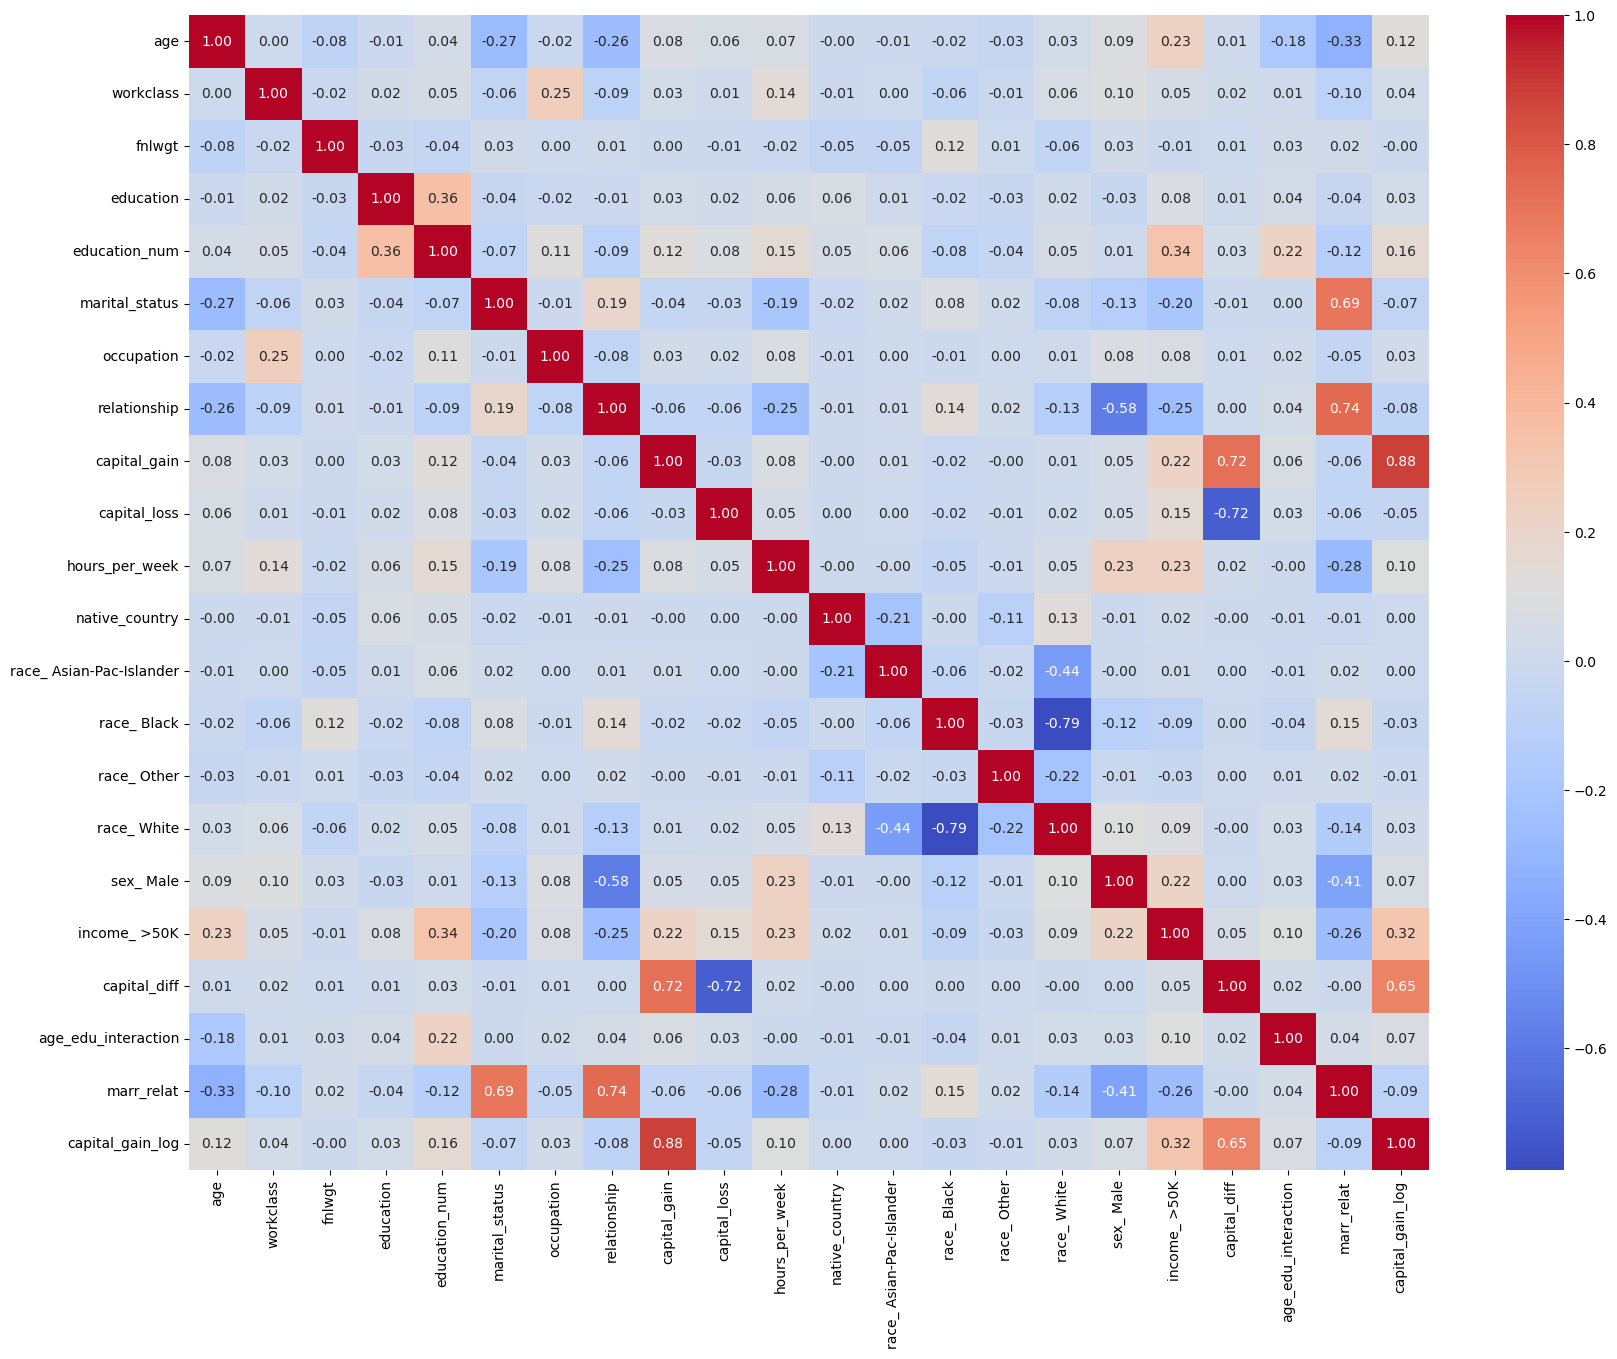

In [161]:
plt.figure(figsize= (20,15))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()